# German credit data decisioning model
## Exploratory data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

In [24]:
# Save raw data to CSV files for future use
statlog_german_credit_data.data.features.to_csv("../src/german_credit_data_features.csv", index=False)
statlog_german_credit_data.data.targets.to_csv("../src/german_credit_data_targets.csv", index=False)

In [53]:
import pprint

# Display metadata
metadata = statlog_german_credit_data.metadata

# metadata 
print("metadata:\n")
# display metadata dictionary beautifully
pprint.pprint(metadata)



metadata:

{'abstract': 'This dataset classifies people described by a set of attributes '
             'as good or bad credit risks. Comes in two formats (one all '
             'numeric). Also comes with a cost matrix',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'Two datasets are provided.  the original '
                                'dataset, in the form provided by Prof. '
                                'Hofmann, contains categorical/symbolic '
                                'attributes and is in the file '
                                '"german.data".   \r\n'
                                ' \r\n'
                                'For algorithms that need numerical '
 

Notes
* Not time-based - test, tune, train split does not require oots.

In [61]:
# Display variable information
variable_info = statlog_german_credit_data.variables

print("Variable information:\n")
print(display(variable_info))

Variable information:



,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


None


Notes
* Column names as 'AttributeX' are unclear
    -> rename.

* Discriminatory features:
    * Description, Index
    * Personal status and sex, 8
    * foreign worker, 19 ?
    * Age, 12
    * Property, 11 ?

* Theoretically poor predictors:
    * Telephone

* Features with hypothesised co-linearity:
    * Age with: Present employment since, Housing, Present residence since, 

Inspect:
* Attribute19 'Telephone' - home or mobile telephone? Why binary?
* Attribute13 'Other installment plans'
* Attribute9 'Marital status - Personal status and sex'
* Present employment since - which units?
* Property - what exactly is this? house type? Whether they own it? Property location?
What do they mean?

Attribute16 'Number of existing credits at this bank' likely to be low - treat as categorical data


In [62]:
# data (as pandas dataframes) 
df = statlog_german_credit_data.data

# Rename columns using the description column from variable_info
df.features.columns = variable_info['description'][:-1].values

X = df.features
#X.columns = variable_info['description'][:-1].values

y = df.targets

# Verify the new column names
display("X with new column names:", X.head())
display("y:", y.head())


'X with new column names:'

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


'y:'

,class
0,1
1,2
2,1
3,1
4,2


In [71]:
# Save renamed data to CSV files for future use
X.to_csv("../src/german_credit_data_features_renamed.csv", index=False)

In [63]:
# check the shape of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 20)
Shape of y: (1000, 1)


1000 pieces of data,
20 features,
1 target.

In [64]:
# Understand X's numeric data
X.describe()

,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Univariate data analysis

In [73]:
import src

ModuleNotFoundError: No module named 'src'

In [65]:
# Separate numeric and categorical columns
# Select columns that are integers in variable_info['type] 
numeric_cols = variable_info[variable_info['type'] == 'Integer']['description'].tolist()
categorical_cols = variable_info[variable_info['type'] == 'Categorical']['description'].tolist()
binary_cols = variable_info[variable_info['type'] == 'Binary']['description'].tolist()

# Add binary columns to categorical columns
categorical_cols += binary_cols

#numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
#categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Binary columns:", binary_cols)


Numeric columns: ['Duration', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for']
Categorical columns: ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', '1 = Good, 2 = Bad']
Binary columns: ['Telephone', 'foreign worker', '1 = Good, 2 = Bad']


In [68]:
# Check if any columns in X are missing from numeric_cols or categorical_cols
missing_cols = set(X.columns) - set(numeric_cols) - set(categorical_cols)
if missing_cols:
    print("Columns in X that are not in numeric_cols or categorical_cols:\n", missing_cols)

In [72]:
src.univariate_multiplotter(X, numeric_cols, categorical_cols, name="Univariate Plots")

NameError: name 'src' is not defined

In [32]:
# plot target distribution
def plot_target_distribution(target, name=None):
    """ Plots the distribution of the target variable."""
    # Set the style of seaborn
    sns.set(style="whitegrid")
    # Create a figure with subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the countplot
    sns.countplot(x=target, ax=ax)
    
    # Set the title and labels
    ax.set_title(f'Distribution of {name}')
    ax.set_xlabel(name)
    ax.set_ylabel('Frequency')
    
    fig.show()
#display(y)
plot_target_distribution(y.values[:,-1], name="Target Variable")

NameError: name 'y' is not defined

### Note:
'Numeric' features with few different values that should be treated as categorical:
* Attribute8 ' Installment rate in percentage of disposable i...'
* Attribute11 'Present residence since'
* Attribute16 'Number of current credits at the bank'
* Attribute18 'Number of people being liable to provide maint...'

Only remaining actually numeric columns:
* 2
* 5
* 18

In [178]:
# Move Attribute8, Attribute11, Attribute16 and Attribute18 from numeric to categorical
# Convert the columns to categorical
few_count_integer_attributes = ['Attribute8', 'Attribute11', 'Attribute16', 'Attribute18']
for attribute in few_count_integer_attributes:
    if attribute in numeric_cols:
        if attribute not in categorical_cols:       
            # Convert the column to categorical
            X[attribute] = pd.Categorical(X[attribute])
            # Remove the column from numeric_cols
            numeric_cols.remove(attribute)
            # Add the column to categorical_cols
            categorical_cols.append(attribute)
        else:
            continue
            print(f"Column {attribute} is already in categorical_cols")
    else:
        continue
        print(f"Column {attribute} is not in numeric_cols")

# check
#print("Expected numeric columns:",'2, 5, 13')
assert numeric_cols == ['Attribute2', 'Attribute5', 'Attribute13'], "Numeric columns do not match expected values"
#print("Numeric columns after moving:", numeric_cols)

# assert that X.columns is made up of numeric_cols and categorical_cols

# Check if any columns in X are missing from numeric_cols or categorical_cols
missing_cols_2 = set(X.columns) - set(numeric_cols) - set(categorical_cols)
if missing_cols_2:
    print("Columns in X that are not in numeric_cols or categorical_cols:\n", missing_cols_2)

# Check if the columns in X are the same as numeric_cols + categorical_col
assert set(X.columns) == set(numeric_cols + categorical_cols), "X columns do not match numeric and categorical columns"



C:\Users\Willi\AppData\Local\Temp\ipykernel_2832\1673708299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attribute] = pd.Categorical(X[attribute])


iteration no: 0
iteration no: 1
iteration no: 2
iteration no: 3
iteration no: 4
iteration no: 5
iteration no: 6
iteration no: 7
iteration no: 8
iteration no: 9
iteration no: 10
iteration no: 11
iteration no: 12
iteration no: 13
iteration no: 14
iteration no: 15
iteration no: 16
iteration no: 17
iteration no: 18
iteration no: 19


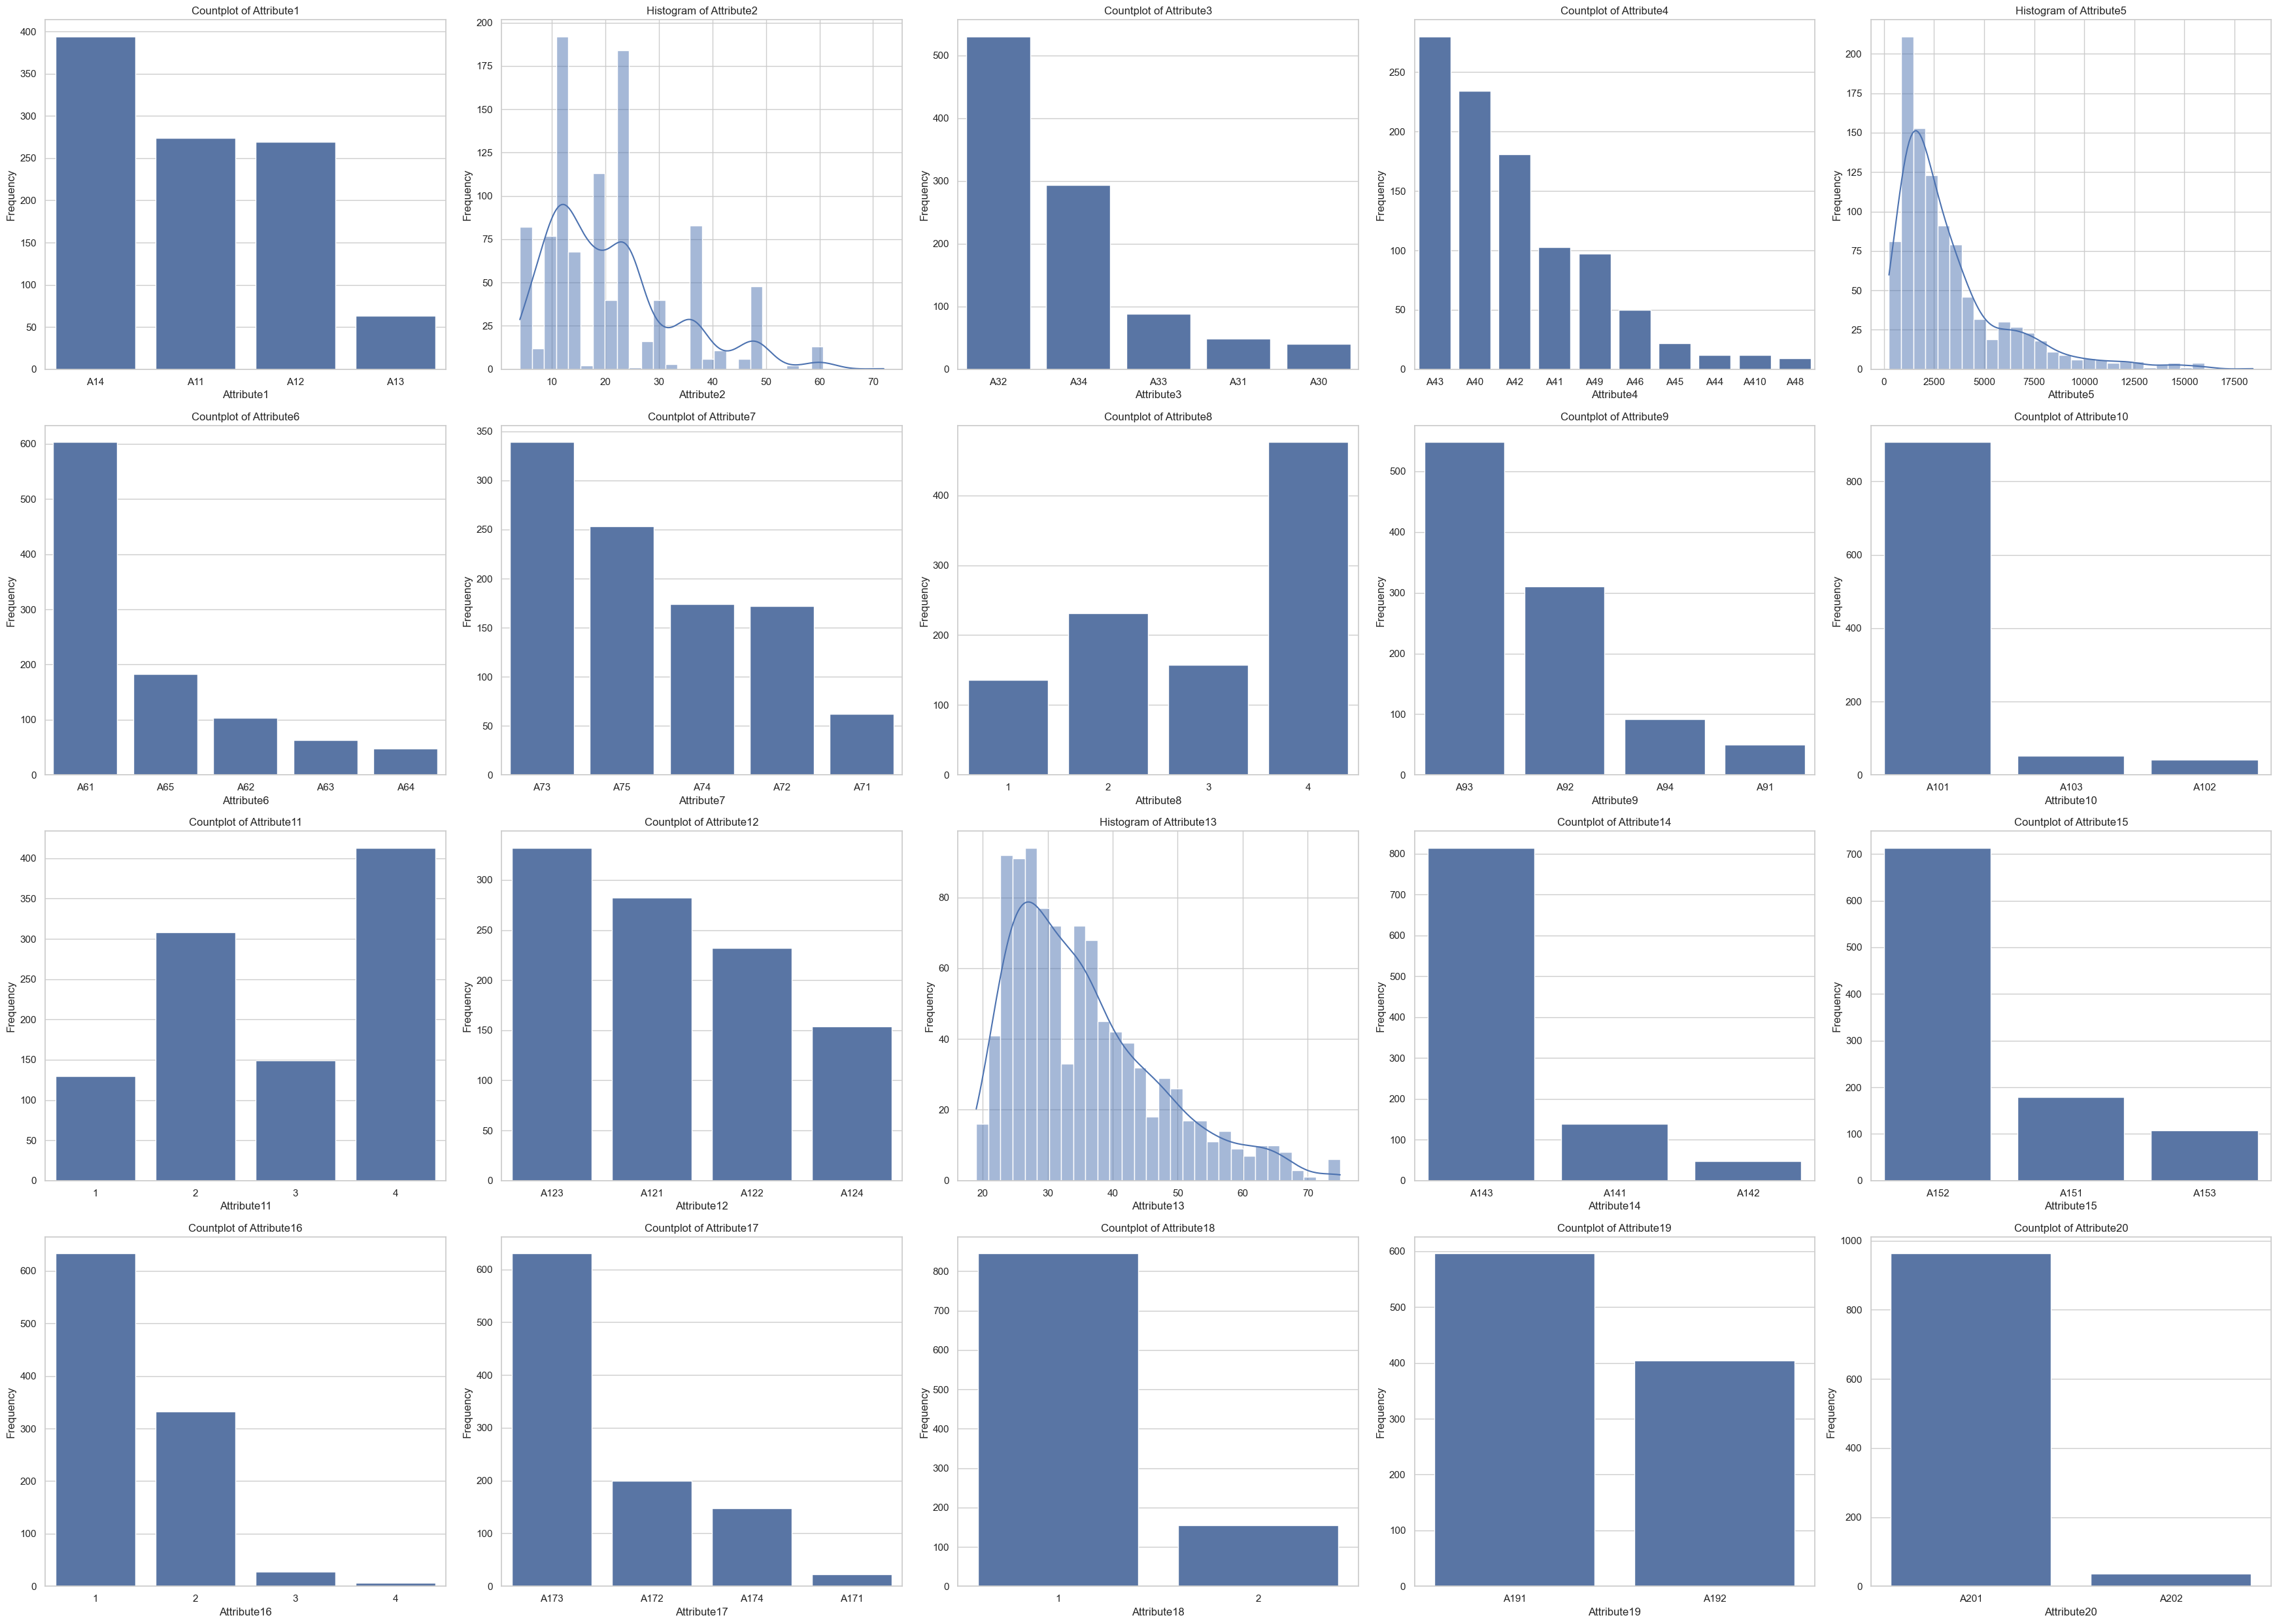

In [ ]:
univariate_multiplotter(X, numeric_cols, categorical_cols, name="Univariate Plots after moving few count integer attributes to categorical")

Numeric data is very skewed - use log transforms.

Features with very imbalanced splits:

In [142]:
# Print categorical and binary columns with categories with counts under 10% of the total
print('Number of data points:', len(X))

for column in categorical_cols + binary_cols:
    counts = X[column].value_counts(normalize=False)
    low_counts = counts[counts < 0.1*len(X[column])]
    # Print the categories with counts under 10% of the total
    if not low_counts.empty:
        print(f"Column '{column}' has categories with counts under 10% of the total:")
        print(low_counts)
        print()

Number of data points: 1000
Column 'Attribute1' has categories with counts under 10% of the total:
Attribute1
A13    63
Name: count, dtype: int64

Column 'Attribute3' has categories with counts under 10% of the total:
Attribute3
A33    88
A31    49
A30    40
Name: count, dtype: int64

Column 'Attribute4' has categories with counts under 10% of the total:
Attribute4
A49     97
A46     50
A45     22
A44     12
A410    12
A48      9
Name: count, dtype: int64

Column 'Attribute6' has categories with counts under 10% of the total:
Attribute6
A63    63
A64    48
Name: count, dtype: int64

Column 'Attribute7' has categories with counts under 10% of the total:
Attribute7
A71    62
Name: count, dtype: int64

Column 'Attribute9' has categories with counts under 10% of the total:
Attribute9
A94    92
A91    50
Name: count, dtype: int64

Column 'Attribute10' has categories with counts under 10% of the total:
Attribute10
A103    52
A102    41
Name: count, dtype: int64

Column 'Attribute14' has cate

## Do univariate AUC analysis for each feature

In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder


In [204]:
# one hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
# check the shape of the encoded data
print("Shape of X_encoded:", X_encoded.shape)
# check the types of the encoded data
print("Types of X_encoded:")
print(X_encoded.dtypes)

# Convert all to float
X_encoded = X_encoded.astype(float)


Shape of X_encoded: (1000, 54)
Types of X_encoded:
Attribute2          int64
Attribute5          int64
Attribute13         int64
Attribute1_A12       bool
Attribute1_A13       bool
Attribute1_A14       bool
Attribute3_A31       bool
Attribute3_A32       bool
Attribute3_A33       bool
Attribute3_A34       bool
Attribute4_A41       bool
Attribute4_A410      bool
Attribute4_A42       bool
Attribute4_A43       bool
Attribute4_A44       bool
Attribute4_A45       bool
Attribute4_A46       bool
Attribute4_A48       bool
Attribute4_A49       bool
Attribute6_A62       bool
Attribute6_A63       bool
Attribute6_A64       bool
Attribute6_A65       bool
Attribute7_A72       bool
Attribute7_A73       bool
Attribute7_A74       bool
Attribute7_A75       bool
Attribute9_A92       bool
Attribute9_A93       bool
Attribute9_A94       bool
Attribute10_A102     bool
Attribute10_A103     bool
Attribute12_A122     bool
Attribute12_A123     bool
Attribute12_A124     bool
Attribute14_A142     bool
Attribute14_A

In [205]:
# Do univariate AUC for numeric columns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [206]:
# Test train split to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [212]:
# Do tuned train split to prevent data leakage
X_mini_train, X_tune, y_mini_train, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
display(y_mini_train)

,class
390,1
847,1
93,1
236,2
858,2
...,...
118,2
334,2
409,2
225,1


In [213]:
# Do univariate AUC for each feature
def univariate_auc(X, y, feature):
    """ Calculate the AUC for a given feature using logistic regression.
    X is a single"""
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)
    
    # Create a pipeline with a scaler and logistic regression
    pipeline = make_pipeline(StandardScaler(), LogisticRegression())
    
    # Fit the model
    pipeline.fit(X_train, y_train.values.ravel())
    
    # Get the predicted probabilities
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    
    return auc


In [214]:
univ_auc_df = pd.DataFrame(columns=['feature', 'auc'])
for feature in X_mini_train.columns:
    auc = univariate_auc(X_mini_train, y_mini_train, feature)
    new_row = pd.DataFrame({'feature': [feature], 'auc': [auc]})
    univ_auc_df = pd.concat([univ_auc_df, new_row], ignore_index=True)

# Sort the dataframe by AUC
univ_auc_df = univ_auc_df.sort_values(by='auc', ascending=False)

display(univ_auc_df.head(10))

C:\Users\Willi\AppData\Local\Temp\ipykernel_2832\1775327027.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  univ_auc_df = pd.concat([univ_auc_df, new_row], ignore_index=True)


,feature,auc
5,Attribute1_A14,0.703310
0,Attribute2,0.675598
37,Attribute15_A152,0.645915
9,Attribute3_A34,0.604544
34,Attribute12_A124,0.602312
3,Attribute1_A12,0.588258
44,Attribute8_2,0.587076
36,Attribute14_A143,0.582742
38,Attribute15_A153,0.558708
2,Attribute13,0.556212


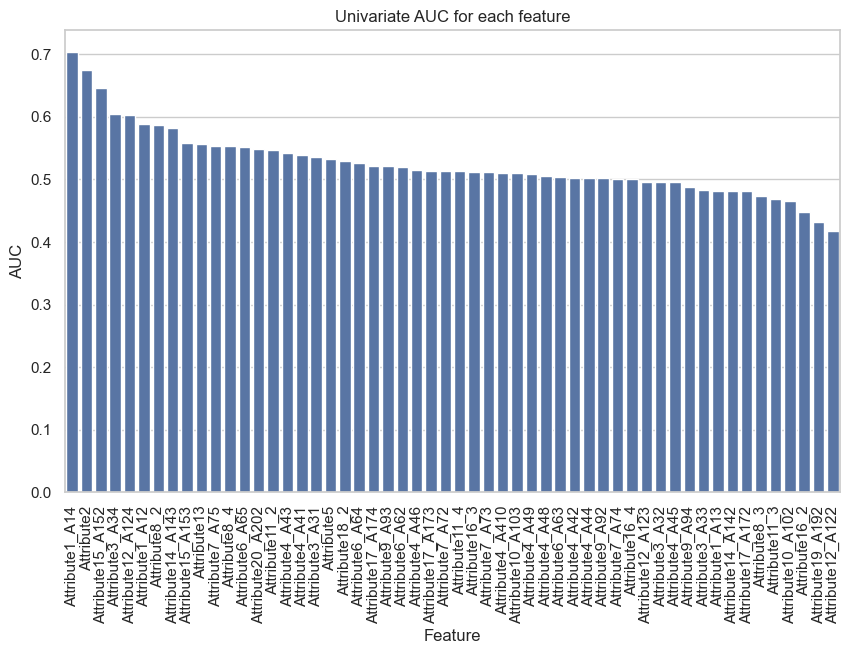

In [ ]:
# Create a bar plot of the AUCs for each feature
def plot_auc(features, aucs):
    """ Plot the AUC for each feature """
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=features, y=aucs, ax=ax)
    ax.set_title('Univariate AUC for each feature')
    ax.set_xlabel('Feature')
    ax.set_ylabel('AUC')
    plt.xticks(rotation=90)
    plt.show()
    
plot_auc(univ_auc_df['feature'], univ_auc_df['auc'])

In [217]:
# List features with AUC > 0.1 away from 0.5
print("Features with AUC > 0.1 away from 0.5:")
print(univ_auc_df[(univ_auc_df['auc'] > 0.6) | (univ_auc_df['auc'] < 0.4)])


Features with AUC > 0.1 away from 0.5:
             feature       auc
5     Attribute1_A14  0.703310
0         Attribute2  0.675598
37  Attribute15_A152  0.645915
9     Attribute3_A34  0.604544
34  Attribute12_A124  0.602312


Only use features:
* Attribute1_A14 ' '
* Attribute2
* Attribute15_A152
* Attribute3_A34
* Attribute12_A124

# Create pipeline